In [1]:
import pandas as pd

In [5]:
housing_dataframe = pd.read_csv(r"C:\Users\User\Machine-Learning-Project\housing\artifact\data_ingestion\2022-09-23-17-42-26\raw_data\housing.csv")

In [6]:
housing_dataframe.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [12]:
import matplotlib.pyplot as plt
import numpy as np

<AxesSubplot:ylabel='Frequency'>

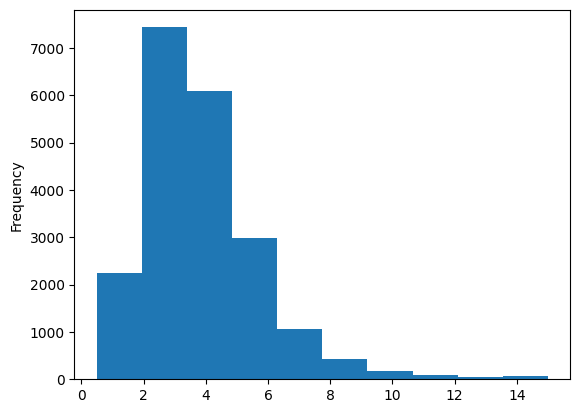

In [10]:
housing_dataframe["median_income"].plot(kind="hist")

As most of the data lies between 0 to 6, we can create a new categorical feature to categorize median_income with the help of bins. This will help us to create a train test split with equal distribution.

In [13]:
housing_dataframe["income_cat"] = pd.cut(
                housing_dataframe['median_income'],
                bins = [0, 1.5, 3.0, 4.5, 6.0, np.inf], ## for creating categories from median_income column
                labels=[1,2,3,4,5]) # labeling the 5 categories with 5 values

In [15]:
housing_dataframe.income_cat.value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

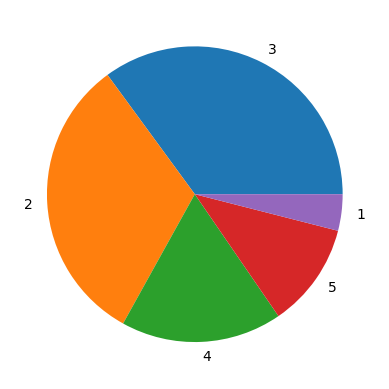

In [23]:
plt.pie(housing_dataframe.income_cat.value_counts(), labels = housing_dataframe.income_cat.value_counts().index)
plt.show()

In [24]:
from sklearn.model_selection import StratifiedShuffleSplit

In [25]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42) 